In [38]:
from __future__ import division
#Let's go ahead and start with some imports

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data, wb, DataReader

# For time stamps
from datetime import datetime

import pandas_datareader as pdr

In [28]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [30]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [29]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,86.841388,84.439429,85.623553,85.722766,1.484994e+08,85.465105
std,20.355031,19.551207,20.145328,19.909930,7.640318e+07,20.064034
min,57.125000,53.152500,57.020000,56.092499,2.794440e+07,55.840385
25%,70.424374,68.841249,69.311878,69.530624,1.005217e+08,69.218113
50%,79.930000,78.793751,79.244999,79.506248,1.335778e+08,79.103245
75%,99.778751,96.707500,99.126875,98.199373,1.819209e+08,98.022640
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,134.179993


<AxesSubplot:xlabel='Date'>

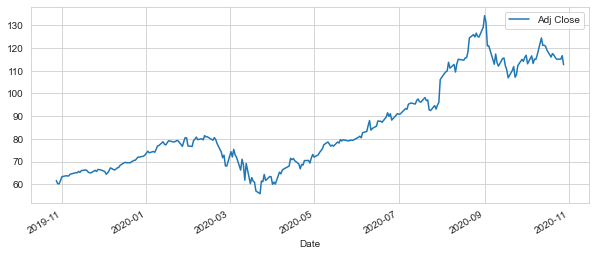

In [32]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

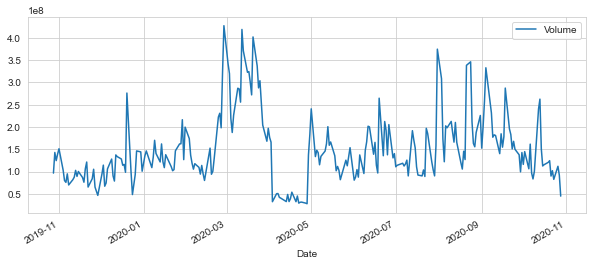

In [58]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [59]:
 #Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [61]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-10-28,61.650810,1290.000000,142.566940,1777.079956
2019-10-29,60.224953,1262.619995,141.222244,1762.709961
2019-10-30,60.217525,1261.290039,142.982224,1779.989990
2019-10-31,61.579021,1260.109985,141.756165,1776.660034
2019-11-01,63.326683,1273.739990,142.102234,1791.439941


In [62]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [64]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-10-28,NaN,NaN,NaN,NaN
2019-10-29,-0.023128,-0.021225,-0.009432,-0.008086
2019-10-30,-0.000123,-0.001053,0.012462,0.009803
2019-10-31,0.022610,-0.000936,-0.008575,-0.001871
2019-11-01,0.028381,0.010817,0.002441,0.008319


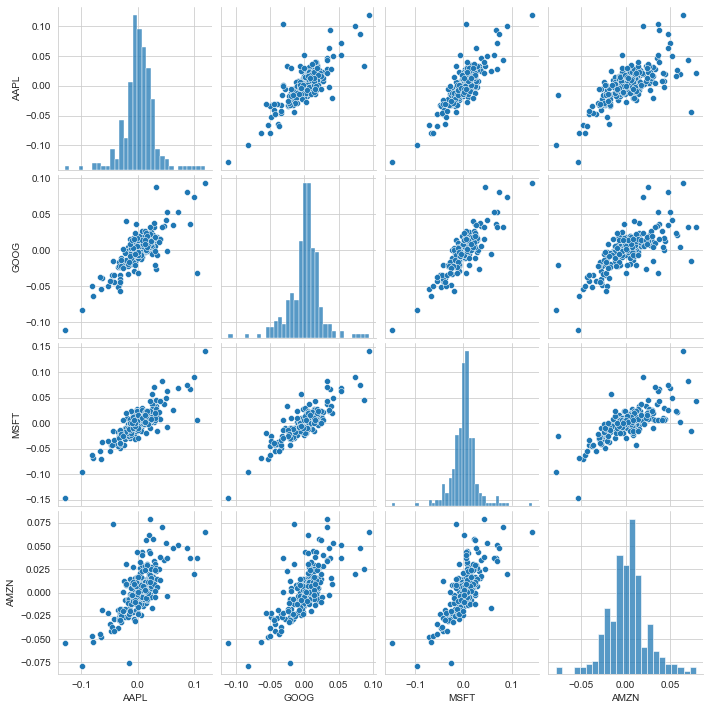

In [66]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons


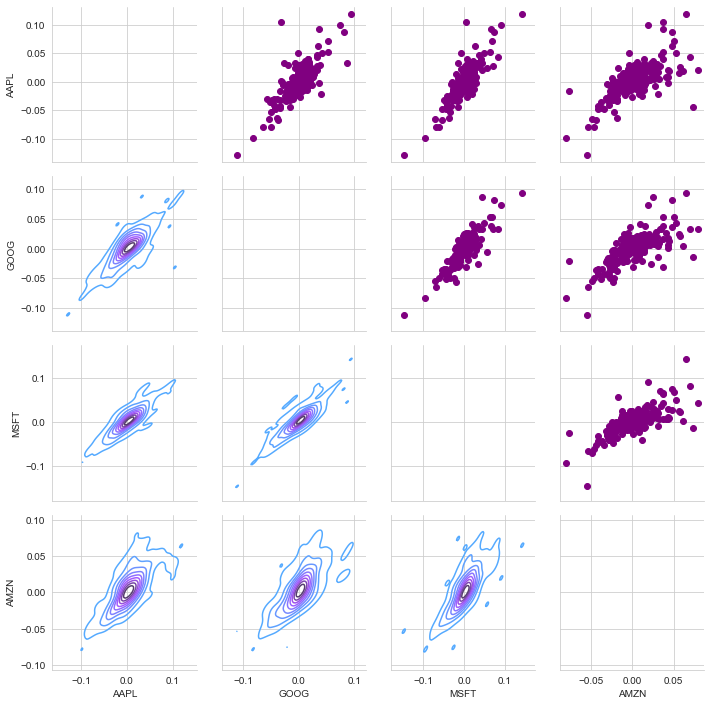

In [67]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

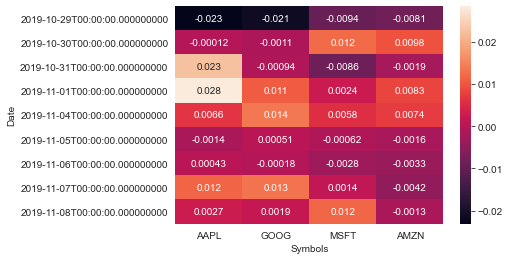

In [75]:
# Let's go ahead and use seaborn for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.head(10).dropna(),annot=True)

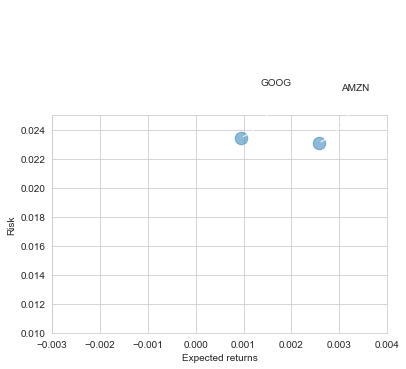

In [77]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*50

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))